# Imports

In [1]:
from scipy.integrate import odeint
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# functions

In [2]:
def model_task1(u, t, sigma, m, K, k1, k2):
    R, I = u
    
    dRdt = sigma * (1 - R)/(1 + I**m) - R
    dIdt = k1*R**n/(R**n + K**n) - k2*I
    
    return dRdt, dIdt

def nullclines(t):
    R_values = list(map(lambda I: 1 / (2 + I), t))
    I_values = list(map(lambda R: R / (R + 1), t))
    return R_values, I_values

# Nullclines

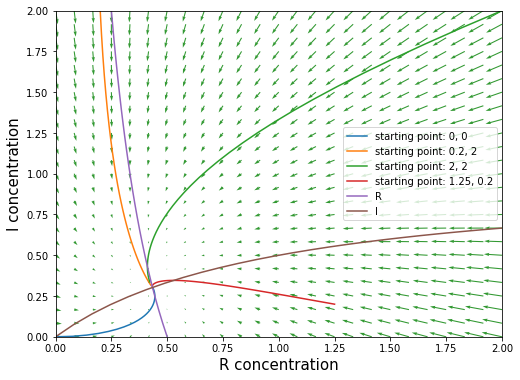

In [3]:
# conditions
sigma = k1 = k2 = K = m = n = 1
t = np.linspace(0, 4)
u0_1 = [0,0]
u0_2 = [0.2, 2]
u0_3 = [2, 2]
u0_4 = [1.25, 0.2]

# solving for different starting points
u1 = odeint(model_task1, u0_1, t, (sigma, m, K, k1, k2))
u2 = odeint(model_task1, u0_2, t, (sigma, m, K, k1, k2))
u3 = odeint(model_task1, u0_3, t, (sigma, m, K, k1, k2))
u4 = odeint(model_task1, u0_4, t, (sigma, m, K, k1, k2))

# here t represents concentrations
nullc = nullclines(t)

# Gradients and their coordinates for quiver
R_coords = np.linspace(0, 2, num = 25)
I_coords = np.linspace(0, 2, num = 25)

R_gradients = np.array([[(1 - R)/(1 + I) - R for R in R_coords] for I in I_coords])
I_gradients = np.array([[R / (R + 1) - I for R in R_coords] for I in I_coords])

# Plotting
plt.figure(figsize=(8,6))
plt.quiver(R_coords, I_coords, R_gradients, I_gradients, alpha = 0.8, color='g')
plt.plot(u1[:,0], u1[:,1], label='starting point: 0, 0')
plt.plot(u2[:,0], u2[:,1], label='starting point: 0.2, 2')
plt.plot(u3[:,0], u3[:,1], label='starting point: 2, 2')
plt.plot(u4[:,0], u4[:,1], label='starting point: 1.25, 0.2')
plt.plot(nullc[0], t, label='R')
plt.plot(t, nullc[1], label='I')
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel('R concentration', size='15')
plt.ylabel('I concentration', size='15')
plt.legend()
plt.show()

# Task 2

# Functions

In [4]:
def Gillespie(x0, t_f):
    x1, x2, x3, x4 = x0
     
    t = 0
    X_trace = [x0]
    t_trace = [0]
    
    lambd = 10**-4
    delta = 10 **-8
    beta = 5 * 10**-5
    kr = 0.3
   
    Nr = [[1,-1,-1,0,0,0],
          [0,0,1,-1,-1,0],
          [0,0,0,0,1,-1],
          [0,0,0,1,0,0]]
    
    while t < t_f:
        alpha = [lambd, delta*x1, beta*x1*x2, 3*10**7*delta*x2, kr*x2, delta*x3]
        W = np.sum(alpha)
        u1 = np.random.rand()
        tau = -np.log(u1)/W
        r = np.where(np.cumsum(alpha)>=W*np.random.rand())[0][0]
        
        while alpha[r] == 0:
            r = r + 1
        x1 = x1 + Nr[0][r]
        x2 = x2 + Nr[1][r]
        x3 = x3 + Nr[2][r]
        x4 = x4 + Nr[3][r]
        t = t + tau
        if t < t_f:
            t_trace.append(t)
            X_trace.append([x1,x2,x3,x4])
       
        
    return X_trace, t_trace

# Task 2b

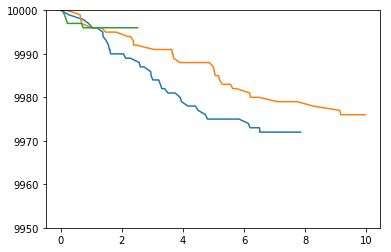

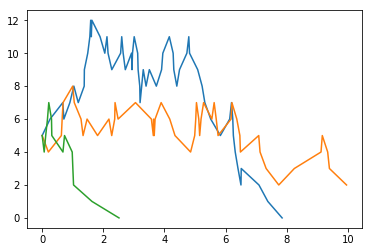

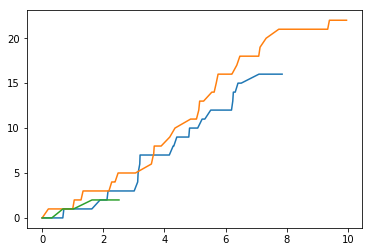

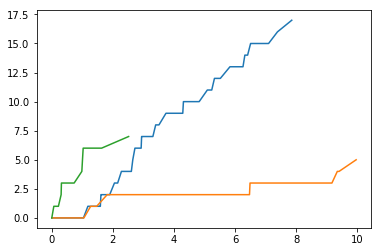

In [5]:
x0 = [10000, 5, 0 , 0]
N = 3
t_f = 10

t_traces = []
x_traces = [[],[],[],[]]

# Gillespie
for i in range(N):
    X_trace, t_trace = Gillespie(x0, t_f)
    t_traces.append(t_trace)
    for j in range(len(x_traces)):
        x_traces[j].append(np.asarray(X_trace)[:,j])

# Plotting
for i in range(len(x_traces)):
    if i == 0:
        plt.ylim(9950, 10000)
    for j in range(N):
        plt.plot(np.asarray(t_traces)[j], np.asarray(x_traces)[i,j])
    plt.show()

# Task 2c and 2d

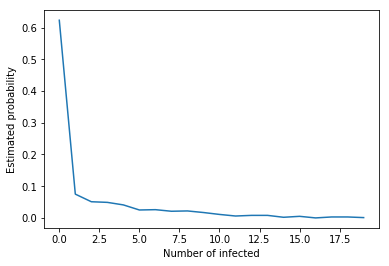

Probability that the infection is still ongoing at T=10:  0.37


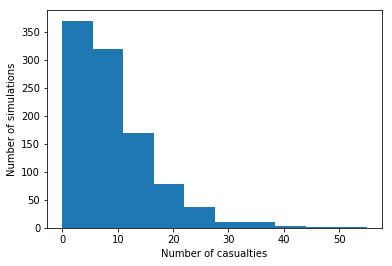

Average number of casualties:  9.19  +/-  7.0


In [6]:
x0 = [10000, 5, 0 , 0]
N = 1000
t_f = 10

t_traces = []
x_traces = [[],[]]

# Gillespie
for i in range(N):
    X_trace, t_trace = Gillespie(x0, t_f)
    t_traces.append(t_trace)
    x_traces[0].append(np.asarray(X_trace)[-1,1])
    x_traces[1].append(np.asarray(X_trace)[-1,2])


probabilities_infected = list(map(lambda n: x_traces[0].count(n) / 1000, range(20)))
probabilities_casualties = list(map(lambda n: x_traces[1].count(n) / 1000, range(35)))

plt.hist(x_traces[0])
plt.xlabel('Number of infected')
plt.ylabel('Number of simulations')
plt.show()

plt.plot(range(20), probabilities_infected)
plt.xlabel('Number of infected')
plt.ylabel('Estimated probability')
plt.show()

print("Probability that the infection is still ongoing at T=10: ", round(sum(probabilities_infected[1:]), 2))

plt.hist(x_traces[1])
plt.xlabel('Number of casualties')
plt.ylabel('Number of simulations')
plt.show()

plt.plot(range(35), probabilities_casualties)
plt.xlabel('Number of casualties')
plt.ylabel('Estimated probability')
plt.show()

print("Average number of casualties: ", round(np.mean(x_traces[1]), 2), " +/- ", round(np.std(x_traces[1])))